In [1]:
import sys, os, json, subprocess

## for data
import pandas as pd
import numpy as np
import datetime

## for machine learning
from scipy import stats
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import sklearn.datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import TransformerMixin
from pandarallel import pandarallel
import multiprocessing

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
    
%matplotlib inline

In [ ]:
data_path = "/Users/sanchit/Desktop/Data Mining/Final project/"
file_path = data_path + "HEV_article_2018.csv"

In [7]:
df = pd.read_csv(file_path)

# Feature Engineering

In [22]:
X = df.drop('buy_electric', axis=1)
y = df['buy_electric']


In [23]:
X1 = X.copy()
X1['buy_electric']= df['buy_electric']

In [ ]:
# for var in interesting_vars:    
#     bivariate_plots(var, 'buy_electric', df)

<AxesSubplot: >

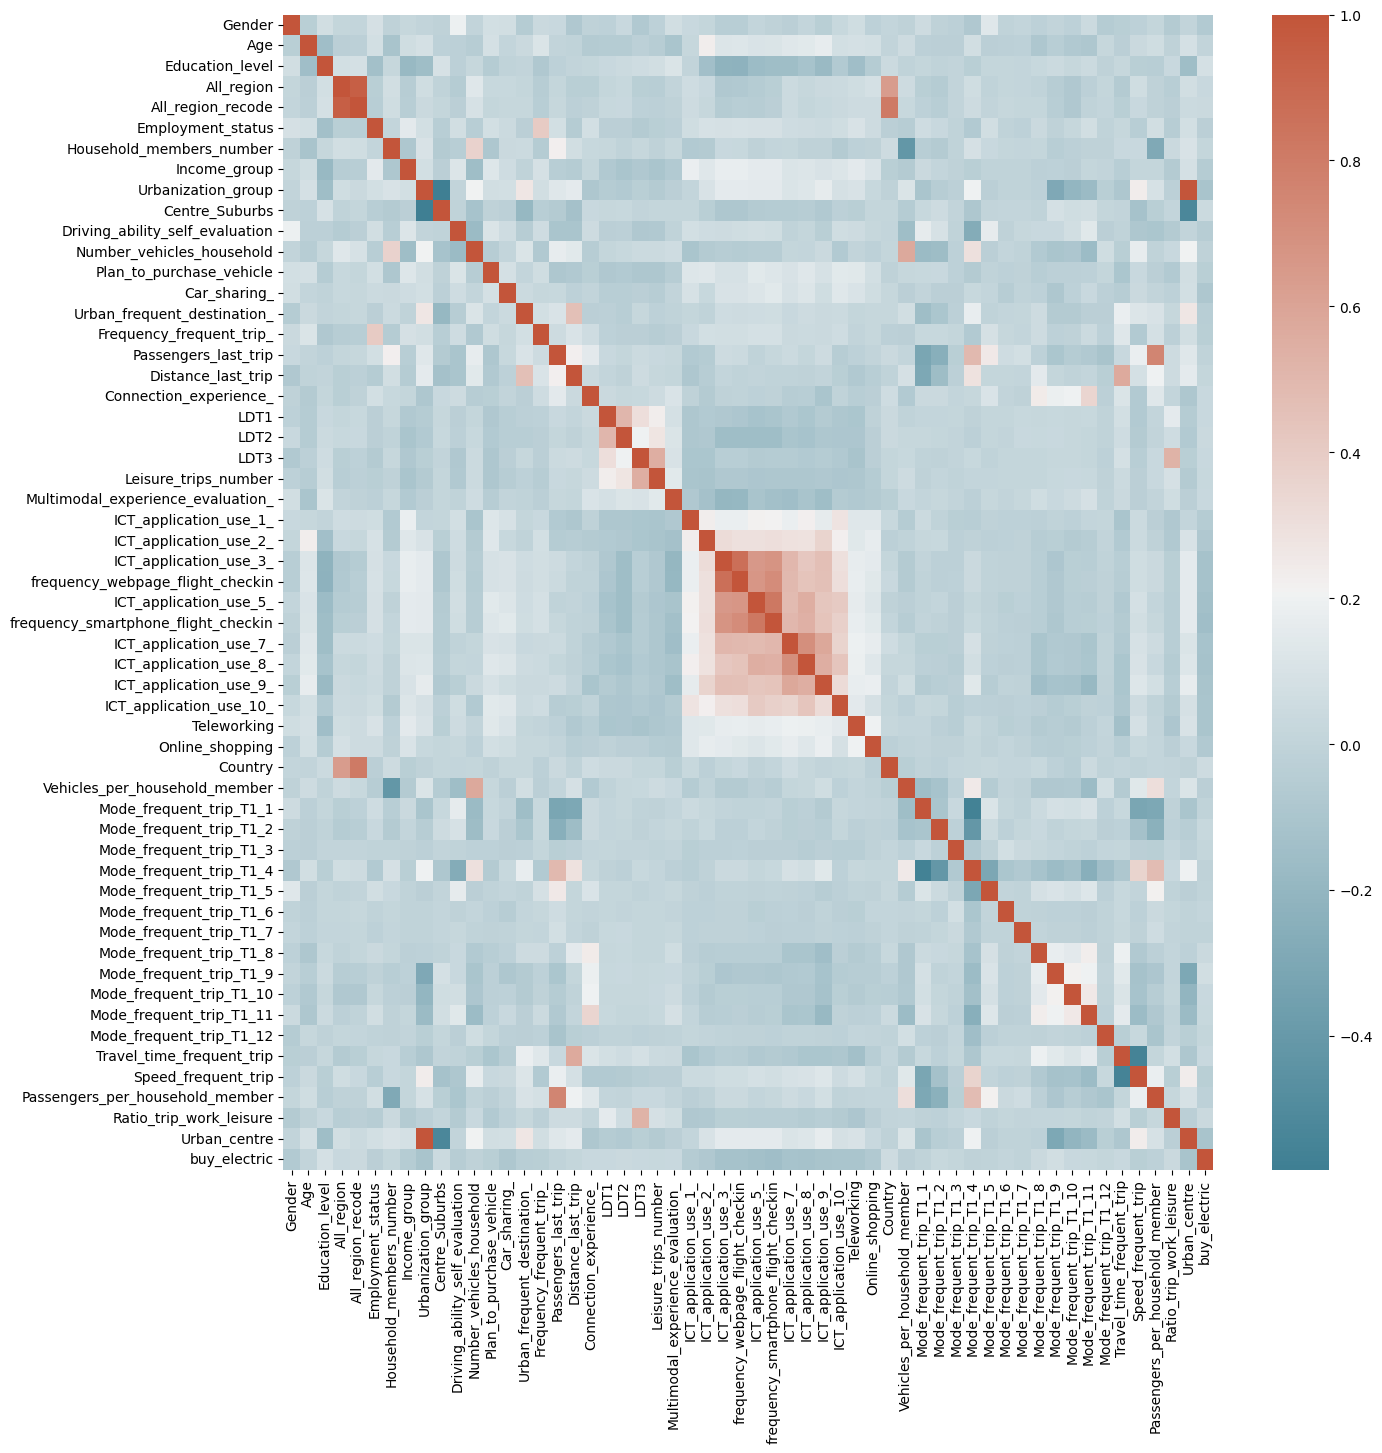

In [24]:
corr =X1.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap=sns.diverging_palette(220,20,as_cmap=True))


In [25]:
# Compute the correlation matrix of all columns in the dataframe
corr_matrix = X.corr().abs()

# Stack the correlation matrix to create a dataframe of pairwise correlations
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Select the pairs of variables that have a correlation coefficient greater than 0.8 (or less than -0.8)
high_corr_pairs = corr_pairs[(corr_pairs > 0.8) & (corr_pairs < 1.0)]

# Print the list of variables that have high correlation with other variables
high_corr_pairs

Urbanization_group                   Urban_centre                           0.997470
Urban_centre                         Urbanization_group                     0.997470
All_region                           All_region_recode                      0.950289
All_region_recode                    All_region                             0.950289
ICT_application_use_3_               frequency_webpage_flight_checkin       0.869344
frequency_webpage_flight_checkin     ICT_application_use_3_                 0.869344
frequency_smartphone_flight_checkin  ICT_application_use_5_                 0.826569
ICT_application_use_5_               frequency_smartphone_flight_checkin    0.826569
All_region_recode                    Country                                0.810300
Country                              All_region_recode                      0.810300
dtype: float64

In [26]:
X.columns

Index(['Gender', 'Age', 'Education_level', 'All_region', 'All_region_recode',
       'Employment_status', 'Household_members_number', 'Income_group',
       'Urbanization_group', 'Centre_Suburbs',
       'Driving_ability_self_evaluation', 'Number_vehicles_household',
       'Plan_to_purchase_vehicle', 'Car_sharing_',
       'Urban_frequent_destination_', 'Frequency_frequent_trip_',
       'Passengers_last_trip', 'Distance_last_trip', 'Connection_experience_',
       'LDT1', 'LDT2', 'LDT3', 'Leisure_trips_number',
       'Multimodal_experience_evaluation_', 'ICT_application_use_1_',
       'ICT_application_use_2_', 'ICT_application_use_3_',
       'frequency_webpage_flight_checkin', 'ICT_application_use_5_',
       'frequency_smartphone_flight_checkin', 'ICT_application_use_7_',
       'ICT_application_use_8_', 'ICT_application_use_9_',
       'ICT_application_use_10_', 'Teleworking', 'Online_shopping', 'Country',
       'Vehicles_per_household_member', 'Mode_frequent_trip_T1_1',
      

In [27]:
X = df

In [30]:
X = X.drop(columns=['buy_electric','Age_bin'])
#X = dataset.drop(columns=['target_variable'])
X.head()

,Gender,Age,Education_level,All_region,All_region_recode,Employment_status,Household_members_number,Income_group,Urbanization_group,Centre_Suburbs,Driving_ability_self_evaluation,Number_vehicles_household,Plan_to_purchase_vehicle,Car_sharing_,Urban_frequent_destination_,Frequency_frequent_trip_,Passengers_last_trip,Distance_last_trip,Connection_experience_,LDT1,LDT2,LDT3,Leisure_trips_number,Multimodal_experience_evaluation_,ICT_application_use_1_,ICT_application_use_2_,ICT_application_use_3_,frequency_webpage_flight_checkin,ICT_application_use_5_,frequency_smartphone_flight_checkin,ICT_application_use_7_,ICT_application_use_8_,ICT_application_use_9_,ICT_application_use_10_,Teleworking,Online_shopping,Country,Vehicles_per_household_member,Mode_frequent_trip_T1_1,Mode_frequent_trip_T1_2,Mode_frequent_trip_T1_3,Mode_frequent_trip_T1_4,Mode_frequent_trip_T1_5,Mode_frequent_trip_T1_6,Mode_frequent_trip_T1_7,Mode_frequent_trip_T1_8,Mode_frequent_trip_T1_9,Mode_frequent_trip_T1_10,Mode_frequent_trip_T1_11,Mode_frequent_trip_T1_12,Travel_time_frequent_trip,Speed_frequent_trip,Passengers_per_household_member,Ratio_trip_work_leisure,Urban_centre
0,1,59,1,3,2,5,2,4,1,1,1,1,4,1,1,3,2,3,2,0,0,30,38,0,3,3,5,5,5,5,4,4,4,4,5,5,1,0.500000,0,0,0,1,0,0,0,0,1,0,0,0,20.0,9.0,1.0,0.789474,11
1,1,45,1,2,1,1,2,3,4,0,1,1,3,2,1,2,1,5,2,2,2,5,5,0,1,3,1,1,3,1,3,3,2,3,1,2,1,0.500000,0,0,0,1,0,0,0,0,0,0,0,0,30.0,10.0,0.5,1.000000,40
2,1,62,2,6,4,5,3,3,3,2,2,2,3,2,1,2,0,1,0,30,1,2,1,2,3,4,3,3,4,2,2,4,4,4,5,4,1,0.666667,0,0,0,0,0,0,0,0,0,1,0,0,15.0,4.0,0.0,2.000000,32
3,1,21,3,3,2,4,3,5,1,1,2,0,2,2,1,2,0,2,0,0,3,0,0,0,4,1,4,4,4,4,4,4,4,4,5,2,1,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,40.0,3.0,0.0,0.000000,11
4,2,54,2,3,2,1,1,4,1,2,1,1,3,2,1,1,1,3,3,0,0,1,1,0,4,4,4,4,4,4,4,4,4,4,3,2,1,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,15.0,12.0,1.0,1.000000,12


In [31]:
y = df['buy_electric']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: buy_electric, dtype: int64

-----------

## Feature Selection using forward selection and logistic regression model

In [33]:
# Forward selection
selected_features = []
best_score = 0

In [34]:
# Loop over features
for feature in X.columns:
    # Skip target variable and already selected features
    if feature in selected_features or feature == 'buy_electric':
        continue
    # Add feature to selected features
    selected_features.append(feature)
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # Evaluate model on test set
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    # Check if score is better than previous best score
    if score > best_score:
        best_score = score
    else:
        # Remove last added feature if score is worse
        selected_features.pop()

In [35]:
selected_features

['Gender',
 'Income_group',
 'Urbanization_group',
 'Centre_Suburbs',
 'Plan_to_purchase_vehicle',
 'Car_sharing_',
 'Passengers_last_trip',
 'LDT3',
 'Leisure_trips_number',
 'ICT_application_use_2_',
 'ICT_application_use_5_',
 'ICT_application_use_8_',
 'Teleworking',
 'Country',
 'Mode_frequent_trip_T1_3',
 'Mode_frequent_trip_T1_7',
 'Passengers_per_household_member',
 'Urban_centre']

In [78]:
print(selected_features)


['Gender', 'Income_group', 'Urbanization_group', 'Centre_Suburbs', 'Plan_to_purchase_vehicle', 'Car_sharing_', 'Passengers_last_trip', 'LDT3', 'Leisure_trips_number', 'ICT_application_use_2_', 'ICT_application_use_5_', 'ICT_application_use_8_', 'Teleworking', 'Country', 'Mode_frequent_trip_T1_6', 'Mode_frequent_trip_T1_7', 'Mode_frequent_trip_T1_10', 'Passengers_per_household_member', 'ICT_application_use_10_', 'Online_shopping', 'Mode_frequent_trip_T1_1', 'Mode_frequent_trip_T1_4', 'Mode_frequent_trip_T1_5']


In [36]:
len(selected_features)

18

In [40]:
X_new = X.loc[:, selected_features] 
X_new

,Gender,Income_group,Urbanization_group,Centre_Suburbs,Plan_to_purchase_vehicle,Car_sharing_,Passengers_last_trip,LDT3,Leisure_trips_number,ICT_application_use_2_,ICT_application_use_5_,ICT_application_use_8_,Teleworking,Country,Mode_frequent_trip_T1_3,Mode_frequent_trip_T1_7,Passengers_per_household_member,Urban_centre
0,1,4,1,1,4,1,2,30,38,3,5,4,5,1,0,0,1.00,11
1,1,3,4,0,3,2,1,5,5,3,3,3,1,1,0,0,0.50,40
2,1,3,3,2,3,2,0,2,1,4,4,4,5,1,0,0,0.00,32
3,1,5,1,1,2,2,0,0,0,1,4,4,5,1,0,0,0.00,11
4,2,4,1,2,3,2,1,1,1,4,4,4,3,1,0,0,1.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17865,2,3,3,2,4,2,1,0,0,4,4,3,5,5,0,0,0.50,32
17866,1,3,4,0,4,2,4,0,0,3,4,4,5,5,0,0,1.00,40
17867,2,3,4,0,4,2,1,0,1,3,4,4,5,5,0,0,0.25,40
17868,1,3,4,0,4,2,1,0,0,2,4,4,5,5,0,0,0.25,40


**Checking for high correlation in selected columns from forward selection (23) below**

In [41]:
# Compute the correlation matrix of all columns in the dataframe
corr_matrix = X_new.corr().abs()

# Stack the correlation matrix to create a dataframe of pairwise correlations
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Select the pairs of variables that have a correlation coefficient greater than 0.8 (or less than -0.8)
high_corr_pairs = corr_pairs[(corr_pairs > 0.8) & (corr_pairs < 1.0)]

# Print the list of variables that have high correlation with other variables
high_corr_pairs

Urban_centre        Urbanization_group    0.99747
Urbanization_group  Urban_centre          0.99747
dtype: float64

In [45]:
X_new = X_new.drop('Urbanization_group',axis=1)